In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ridge_regression, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv('C:\\Users\\LENOVO\\Documents\\My_Documents\\Coding projects\\Laptop price prediction\\dataset\\Laptop_data_refined.csv')

In [36]:
df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,OpSys,Price,ScreenType,Gpu_Model,...,ScreenType_Quad HD,ScreenType_Regular,ScreenType_Touchscreen,Gpu_Model_freq,ScreenResolution_freq,Cpu_Model_freq,Memory_Type_freq,Cpu_Company_AMD,Cpu_Company_Intel,Cpu_Company_Samsung
0,Apple,13.3,2560x1600,Intel,8,128GB,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,...,0,0,0,8,13,2,642,0,1,0
1,Apple,13.3,1440x900,Intel,8,128GB,macOS,47895.52,Regular,HD Graphics 6000,...,0,1,0,5,4,2,74,0,1,0
2,Apple,15.4,2880x1800,Intel,16,512GB,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,...,0,0,0,1,4,1,642,0,1,0
3,Apple,13.3,2560x1600,Intel,8,256GB,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,...,0,0,0,2,13,2,642,0,1,0
4,Acer,15.6,1366x768,AMD,4,500GB,Windows 10,21312.00,Regular,Radeon R5,...,0,1,0,11,282,11,331,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,Acer,15.6,1920x1080,Intel,16,512GB,Windows 11,128000.00,Full HD,GeForce RTX 3060,...,0,0,0,6,809,8,642,0,1,0
1248,Asus,17.3,2560x1440,Intel,32,2TB,Windows 11,295000.00,QHD,GeForce RTX 4080,...,0,0,0,3,27,3,642,0,1,0
1249,Razer,16.0,2560x1600,Intel,32,1TB,Windows 11,275000.00,QHD,GeForce RTX 4080,...,0,0,0,3,13,1,642,0,1,0
1250,MSI,15.6,1920x1080,Intel,16,1TB,Windows 11,152000.00,Full HD,GeForce RTX 3070,...,0,0,0,3,809,8,642,0,1,0


In [37]:
df.columns

Index(['Company', 'Inches', 'ScreenResolution', 'Cpu_Company', 'Ram_in_GB',
       'Memory', 'OpSys', 'Price', 'ScreenType', 'Gpu_Model', 'Cpu_Model',
       'Memory_Type', 'Company_freq', 'Ram_in_GB_freq', 'Inches_freq',
       'Memory_freq', 'Gpu_Company_orig', 'Gpu_Company_Amd', 'Gpu_Company_Arm',
       'Gpu_Company_Intel', 'Gpu_Company_Nvidia', 'OpSys_freq',
       'ScreenType_Full HD ', 'ScreenType_IPS Panel ',
       'ScreenType_IPS Panel Full HD ', 'ScreenType_IPS Panel Quad HD',
       'ScreenType_IPS Panel Retina Display ',
       'ScreenType_IPS Panel Touchscreen ', 'ScreenType_QHD ',
       'ScreenType_Quad HD', 'ScreenType_Regular', 'ScreenType_Touchscreen ',
       'Gpu_Model_freq', 'ScreenResolution_freq', 'Cpu_Model_freq',
       'Memory_Type_freq', 'Cpu_Company_AMD', 'Cpu_Company_Intel',
       'Cpu_Company_Samsung'],
      dtype='object')

In [38]:
df.groupby('Company')['Price'].sum().reset_index()

,Company,Price
0,ASUS,360000.00
1,Acer,4012645.43
2,Apple,1750150.49
3,Asus,9551489.93
4,Chuwi,50237.18
5,Dell,19315084.03
6,Fujitsu,116523.36
7,Google,268158.24
8,HP,15592890.91
9,Huawei,151741.44


<Axes: xlabel='Ram_in_GB', ylabel='Price'>

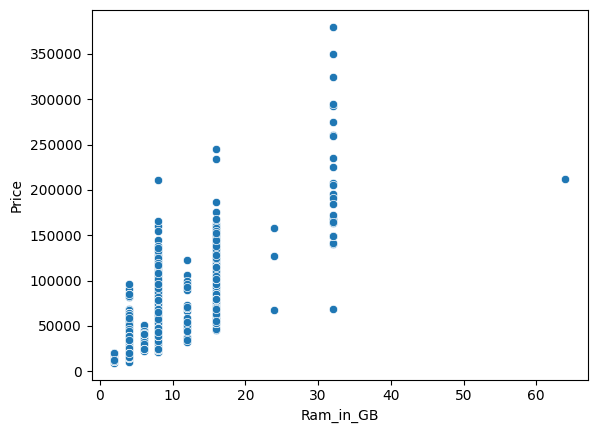

In [39]:
sns.scatterplot(data=df,x='Ram_in_GB',y='Price')

<Axes: xlabel='Ram_in_GB', ylabel='Price'>

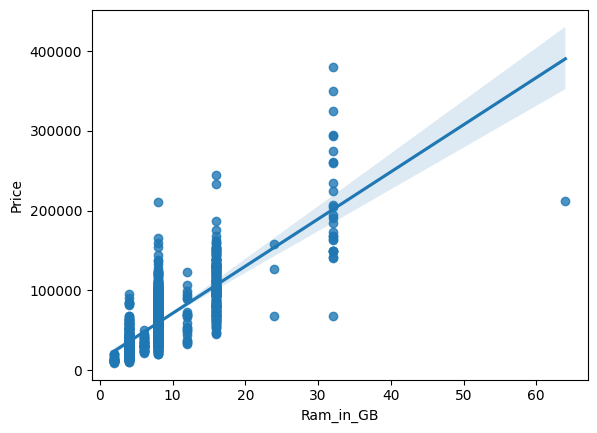

In [40]:
sns.regplot(data=df,x='Ram_in_GB',y='Price')

<Axes: xlabel='Price', ylabel='Count'>

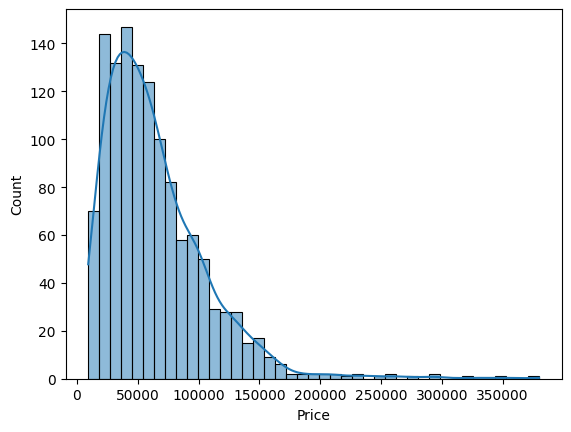

In [41]:
sns.histplot(df['Price'], kde=True)

this is highly left skewed

In [42]:
df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,OpSys,Price,ScreenType,Gpu_Model,...,ScreenType_Quad HD,ScreenType_Regular,ScreenType_Touchscreen,Gpu_Model_freq,ScreenResolution_freq,Cpu_Model_freq,Memory_Type_freq,Cpu_Company_AMD,Cpu_Company_Intel,Cpu_Company_Samsung
0,Apple,13.3,2560x1600,Intel,8,128GB,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,...,0,0,0,8,13,2,642,0,1,0
1,Apple,13.3,1440x900,Intel,8,128GB,macOS,47895.52,Regular,HD Graphics 6000,...,0,1,0,5,4,2,74,0,1,0
2,Apple,15.4,2880x1800,Intel,16,512GB,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,...,0,0,0,1,4,1,642,0,1,0
3,Apple,13.3,2560x1600,Intel,8,256GB,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,...,0,0,0,2,13,2,642,0,1,0
4,Acer,15.6,1366x768,AMD,4,500GB,Windows 10,21312.00,Regular,Radeon R5,...,0,1,0,11,282,11,331,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,Acer,15.6,1920x1080,Intel,16,512GB,Windows 11,128000.00,Full HD,GeForce RTX 3060,...,0,0,0,6,809,8,642,0,1,0
1248,Asus,17.3,2560x1440,Intel,32,2TB,Windows 11,295000.00,QHD,GeForce RTX 4080,...,0,0,0,3,27,3,642,0,1,0
1249,Razer,16.0,2560x1600,Intel,32,1TB,Windows 11,275000.00,QHD,GeForce RTX 4080,...,0,0,0,3,13,1,642,0,1,0
1250,MSI,15.6,1920x1080,Intel,16,1TB,Windows 11,152000.00,Full HD,GeForce RTX 3070,...,0,0,0,3,809,8,642,0,1,0


In [43]:
df.columns

Index(['Company', 'Inches', 'ScreenResolution', 'Cpu_Company', 'Ram_in_GB',
       'Memory', 'OpSys', 'Price', 'ScreenType', 'Gpu_Model', 'Cpu_Model',
       'Memory_Type', 'Company_freq', 'Ram_in_GB_freq', 'Inches_freq',
       'Memory_freq', 'Gpu_Company_orig', 'Gpu_Company_Amd', 'Gpu_Company_Arm',
       'Gpu_Company_Intel', 'Gpu_Company_Nvidia', 'OpSys_freq',
       'ScreenType_Full HD ', 'ScreenType_IPS Panel ',
       'ScreenType_IPS Panel Full HD ', 'ScreenType_IPS Panel Quad HD',
       'ScreenType_IPS Panel Retina Display ',
       'ScreenType_IPS Panel Touchscreen ', 'ScreenType_QHD ',
       'ScreenType_Quad HD', 'ScreenType_Regular', 'ScreenType_Touchscreen ',
       'Gpu_Model_freq', 'ScreenResolution_freq', 'Cpu_Model_freq',
       'Memory_Type_freq', 'Cpu_Company_AMD', 'Cpu_Company_Intel',
       'Cpu_Company_Samsung'],
      dtype='object')

In [44]:
df['Cpu_Company'].value_counts()

Cpu_Company
Intel      1189
AMD          62
Samsung       1
Name: count, dtype: int64

In [57]:
df1 = df.drop(columns=['Company','ScreenResolution','Cpu_Company','Memory','OpSys','ScreenType','Gpu_Model','Cpu_Model',
                       'Inches_freq','Gpu_Company_orig','Memory_Type','Ram_in_GB_freq'])

In [58]:
df1

,Inches,Ram_in_GB,Price,Company_freq,Memory_freq,Gpu_Company_Amd,Gpu_Company_Arm,Gpu_Company_Intel,Gpu_Company_Nvidia,OpSys_freq,...,ScreenType_Quad HD,ScreenType_Regular,ScreenType_Touchscreen,Gpu_Model_freq,ScreenResolution_freq,Cpu_Model_freq,Memory_Type_freq,Cpu_Company_AMD,Cpu_Company_Intel,Cpu_Company_Samsung
0,13.3,8,71378.68,21,177,0,0,1,0,13,...,0,0,0,8,13,2,642,0,1,0
1,13.3,8,47895.52,21,177,0,0,1,0,13,...,0,1,0,5,4,2,74,0,1,0
2,15.4,16,135195.34,21,145,1,0,0,0,13,...,0,0,0,1,4,1,642,0,1,0
3,13.3,8,96095.81,21,508,0,0,1,0,13,...,0,0,0,2,13,2,642,0,1,0
4,15.6,4,21312.00,107,132,1,0,0,0,1065,...,0,1,0,11,282,11,331,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,15.6,16,128000.00,107,145,0,0,0,1,29,...,0,0,0,6,809,8,642,0,1,0
1248,17.3,32,295000.00,160,21,0,0,0,1,29,...,0,0,0,3,27,3,642,0,1,0
1249,16.0,32,275000.00,9,260,0,0,0,1,29,...,0,0,0,3,13,1,642,0,1,0
1250,15.6,16,152000.00,59,260,0,0,0,1,29,...,0,0,0,3,809,8,642,0,1,0


In [59]:
df['Ram_in_GB'].value_counts()

Ram_in_GB
8     583
4     342
16    211
6      38
32     27
12     25
2      22
24      3
64      1
Name: count, dtype: int64

In [60]:
df1.corr()

,Inches,Ram_in_GB,Price,Company_freq,Memory_freq,Gpu_Company_Amd,Gpu_Company_Arm,Gpu_Company_Intel,Gpu_Company_Nvidia,OpSys_freq,...,ScreenType_Quad HD,ScreenType_Regular,ScreenType_Touchscreen,Gpu_Model_freq,ScreenResolution_freq,Cpu_Model_freq,Memory_Type_freq,Cpu_Company_AMD,Cpu_Company_Intel,Cpu_Company_Samsung
Inches,1.000000,0.275930,0.133509,0.000977,0.031817,0.208681,-0.052672,-0.614545,0.508140,0.127956,...,-0.141546,0.030580,-0.179667,-0.293211,0.186391,0.097610,-0.269431,0.137225,-0.129382,-0.052672
Ram_in_GB,0.275930,1.000000,0.777460,-0.092073,0.097603,-0.108796,-0.024153,-0.344358,0.449444,-0.012509,...,0.026606,-0.307881,-0.019914,-0.168870,0.068159,0.051754,0.032092,-0.056531,0.059225,-0.024153
Price,0.133509,0.777460,1.000000,-0.078599,0.154785,-0.203579,-0.019275,-0.229063,0.395090,-0.093071,...,0.062265,-0.346020,0.010887,-0.063703,0.008704,0.036557,0.193411,-0.126121,0.127660,-0.019275
Company_freq,0.000977,-0.092073,-0.078599,1.000000,0.045628,0.170070,-0.060724,0.030490,-0.153275,0.154834,...,0.077215,-0.011223,-0.048767,0.119796,0.056568,0.095503,0.133144,0.008475,-0.000564,-0.060724
Memory_freq,0.031817,0.097603,0.154785,0.045628,1.000000,0.014462,-0.041887,-0.065771,0.062341,0.100901,...,0.058255,-0.319490,-0.042607,0.128324,0.294839,0.236191,0.381016,-0.051735,0.056757,-0.041887
Gpu_Company_Amd,0.208681,-0.108796,-0.203579,0.170070,0.014462,1.000000,-0.011092,-0.433309,-0.266842,-0.024229,...,-0.047383,0.070645,-0.066532,-0.309189,0.042500,-0.082415,-0.061473,0.527665,-0.522247,-0.011092
Gpu_Company_Arm,-0.052672,-0.024153,-0.019275,-0.060724,-0.041887,-0.011092,1.000000,-0.031227,-0.019230,-0.068439,...,-0.003415,-0.015906,-0.004795,-0.026761,-0.054142,-0.033759,-0.049410,-0.006453,-0.122826,1.000000
Gpu_Company_Intel,-0.614545,-0.344358,-0.229063,0.030490,-0.065771,-0.433309,-0.031227,1.000000,-0.751217,-0.039038,...,0.109351,0.175037,0.153544,0.661293,-0.238692,-0.058220,0.240673,-0.252102,0.254234,-0.031227
Gpu_Company_Nvidia,0.508140,0.449444,0.395090,-0.153275,0.062341,-0.266842,-0.019230,-0.751217,1.000000,0.063639,...,-0.082147,-0.237958,-0.115345,-0.479847,0.227597,0.124596,-0.209554,-0.115666,0.117278,-0.019230
OpSys_freq,0.127956,-0.012509,-0.093071,0.154834,0.100901,-0.024229,-0.068439,-0.039038,0.063639,1.000000,...,0.013135,-0.077289,-0.081810,0.152946,0.221265,0.239333,-0.002825,0.032812,-0.023720,-0.068439


<Axes: xlabel='Ram_in_GB', ylabel='Price'>

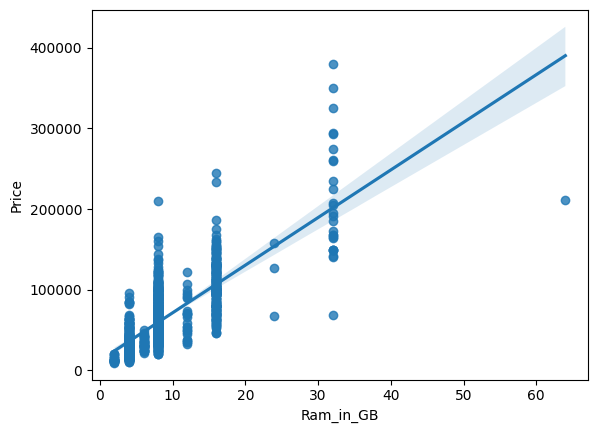

In [61]:
sns.regplot(data=df,x='Ram_in_GB',y='Price')

In [63]:
X = df1.drop('Price',axis = 1)
Y = df1['Price']

In [64]:
X

,Inches,Ram_in_GB,Company_freq,Memory_freq,Gpu_Company_Amd,Gpu_Company_Arm,Gpu_Company_Intel,Gpu_Company_Nvidia,OpSys_freq,ScreenType_Full HD,...,ScreenType_Quad HD,ScreenType_Regular,ScreenType_Touchscreen,Gpu_Model_freq,ScreenResolution_freq,Cpu_Model_freq,Memory_Type_freq,Cpu_Company_AMD,Cpu_Company_Intel,Cpu_Company_Samsung
0,13.3,8,21,177,0,0,1,0,13,0,...,0,0,0,8,13,2,642,0,1,0
1,13.3,8,21,177,0,0,1,0,13,0,...,0,1,0,5,4,2,74,0,1,0
2,15.4,16,21,145,1,0,0,0,13,0,...,0,0,0,1,4,1,642,0,1,0
3,13.3,8,21,508,0,0,1,0,13,0,...,0,0,0,2,13,2,642,0,1,0
4,15.6,4,107,132,1,0,0,0,1065,0,...,0,1,0,11,282,11,331,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,15.6,16,107,145,0,0,0,1,29,1,...,0,0,0,6,809,8,642,0,1,0
1248,17.3,32,160,21,0,0,0,1,29,0,...,0,0,0,3,27,3,642,0,1,0
1249,16.0,32,9,260,0,0,0,1,29,0,...,0,0,0,3,13,1,642,0,1,0
1250,15.6,16,59,260,0,0,0,1,29,1,...,0,0,0,3,809,8,642,0,1,0


In [ ]:
X_train, 